# 🧠 Model Inversion on MNIST using Label-only Attack
This notebook demonstrates how to reconstruct images using model inversion attacks with only label information, following the structure of the paper: **'Label-only Model Inversion Attack: The Attack that Requires the Least'**

## 📥 Step 1: Setup and Install Dependencies

In [1]:
!pip install torch torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install torch torchvision


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python -c "import torch; print(torch.__version__)"


2.6.0+cpu


In [4]:
!python -m pip install ipykernel
!python -m ipykernel install --user --name torch_env --display-name "Python (with torch)"


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Installed kernelspec torch_env in C:\Users\USER\AppData\Roaming\jupyter\kernels\torch_env


In [5]:
!python -m ipykernel install --user --name=torch_env --display-name "Python (with torch)"


Installed kernelspec torch_env in C:\Users\USER\AppData\Roaming\jupyter\kernels\torch_env


In [6]:
import torch
print(torch.__version__)


2.6.0+cpu


In [7]:
import sys
import os

# Thêm thư mục hiện tại vào sys.path để import được các file .py bên cạnh
sys.path.append(os.getcwd())


## 📁 Step 2: Load MNIST Dataset

In [8]:
from data_loader import load_mnist_data
train_set, test_set = load_mnist_data()
print(f"Training samples: {len(train_set)}, Test samples: {len(test_set)}")

Training samples: 60000, Test samples: 10000


## 🏗️ Step 3: Build a Dummy Target Model

In [9]:
import torch.nn as nn
class DummyTargetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28*28, 10)
    def forward(self, x):
        return self.fc(x.view(x.size(0), -1))
target_model = DummyTargetModel()

## 🧪 Step 4: Prepare Sample Inputs

In [10]:
samples = [test_set[i] for i in range(10)]
images = torch.stack([img for img, _ in samples])
labels = torch.tensor([label for _, label in samples])

## 🧩 Step 5: Generate Confidence Vectors from 4 Attacks

In [11]:
from attacks.label_only_attack import train_shadow_model
from utils import add_gaussian_noise
from phase1_vector_recovery import generate_confidence_vectors

# Auxiliary data
aux_images = torch.stack([train_set[i][0] for i in range(100)])
d_neg = torch.stack([train_set[i][0] for i in range(1000, 1100)])
shadow_model = train_shadow_model(aux_images, d_neg)

methods = ["label_only", "vector_based", "score_based", "one_hot"]
vectors_by_method = {}
for method in methods:
    vectors_by_method[method] = generate_confidence_vectors(images, labels, target_model, method, shadow_model, mu=0.1)

## 🧠 Step 6: Train Attack Model to Reconstruct Images

In [12]:
from phase2_train_attack_model import train_attack_model
attack_models = {}
for method in methods:
    attack_models[method] = train_attack_model(vectors_by_method[method], images)

## Step 7: Reconstruct and Compare Results

In [13]:
import importlib
import phase3_reconstruct
importlib.reload(phase3_reconstruct)

from phase3_reconstruct import reconstruct_images


In [14]:
import importlib
import utils
importlib.reload(utils)



<module 'utils' from "D:\\Computer Science\\ELTE's MSc\\Data Security\\model_inversion_mnist\\model_inversion_mnist\\utils.py">

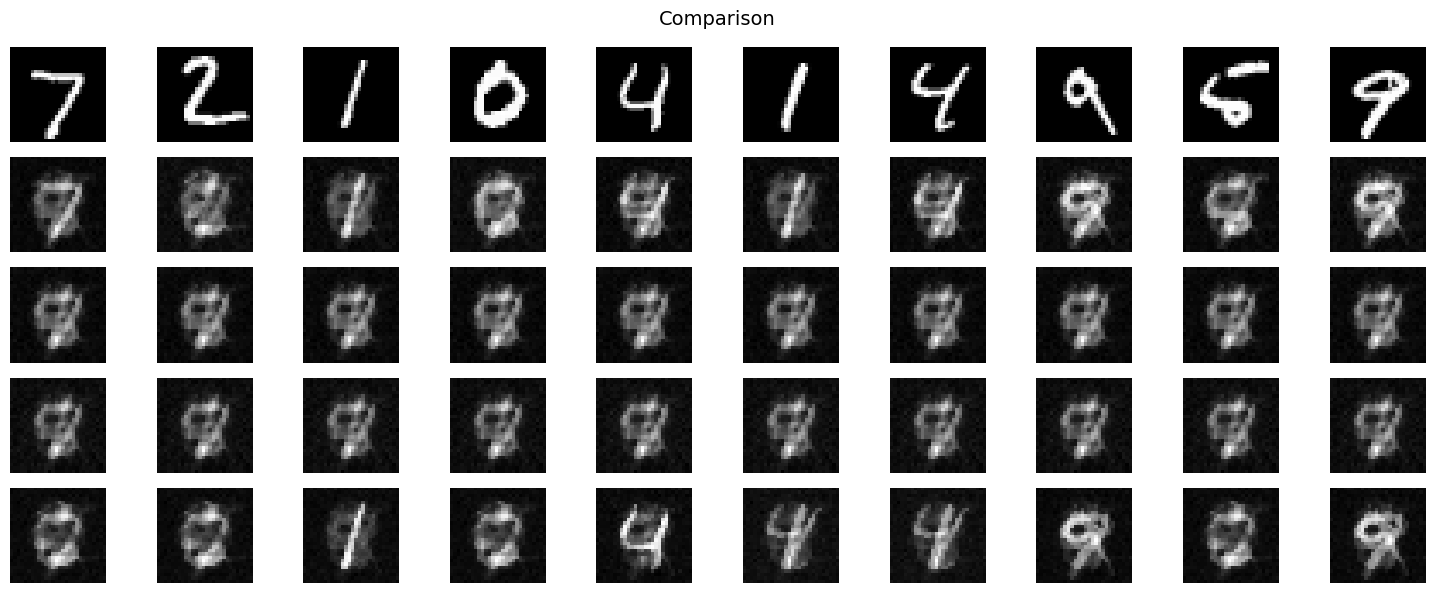

In [15]:
from phase3_reconstruct import reconstruct_images
from phase4_evaluation import evaluate_reconstructions

method_labels = {
    "label_only": "Label only",
    "vector_based": "Vector-based",
    "score_based": "Score-based",
    "one_hot": "One hot"
}

results = {}
for method in methods:
    recon = reconstruct_images(attack_models[method], vectors_by_method[method])
    label = method_labels[method]  # dùng tên chuẩn
    results[label] = recon

from utils import plot_comparison
plot_comparison(images, results, title='Comparison')


